# German Credit Risk Data has been analyzed and modeled.

Step 1: Importing Necessary Libraries and Data

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn import tree
import graphviz

%matplotlib inline

gd = pd.read_csv('UCI_Credit_Card.csv',index_col=0)
gd.head()

ModuleNotFoundError: No module named 'graphviz'

Step 2: Analyzing Data

In [2]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

In [3]:
gd.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#sns.pairplot(gd)

In [8]:
#sns.pairplot(gd,hue='Risk')

In [9]:
#sns.jointplot(x='Age',y='Duration',data=gd,kind='reg')

Step3: Creating Dummy Variables

In [10]:
#categorical_variable=gd.describe(include=['O'])

In [11]:
#categorical_variable_col = set(categorical_variable.columns) 

In [12]:
#gd_dummy=pd.get_dummies(gd, columns=categorical_variable_col)

In [8]:
gd_dummy.head(5)

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Risk_bad,Risk_good,Saving accounts_little,Saving accounts_moderate,...,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Checking account_little,Checking account_moderate,Checking account_rich,Housing_free,Housing_own,Housing_rent
0,67,2,1169,6,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,22,2,5951,48,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,49,1,2096,12,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,45,2,7882,42,0,1,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
4,53,2,4870,24,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [13]:
#gd['Sex'].value_counts()

In [ ]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in gd.columns:
     if gd[col].dtype == "object":
        cols_list.append(col)
        
# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Risk', kind='count', data=gd)
    plt.xticks(rotation=45)

C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


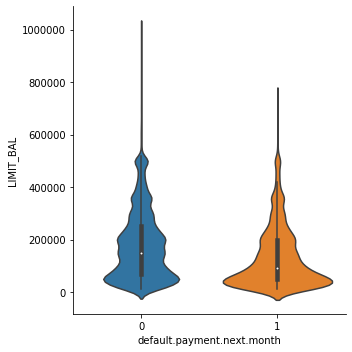

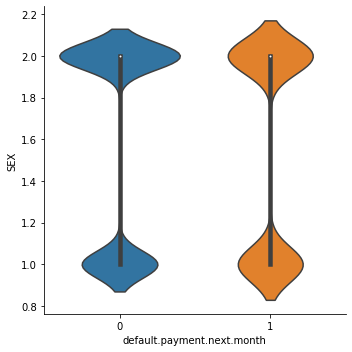

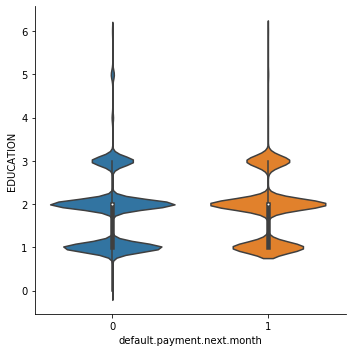

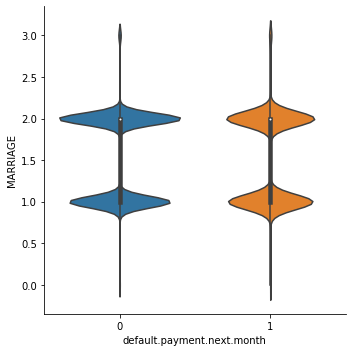

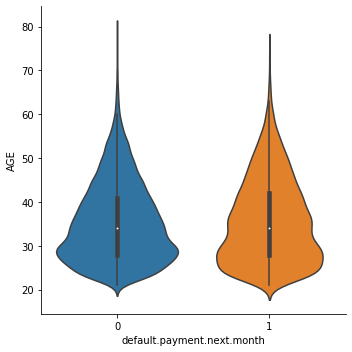

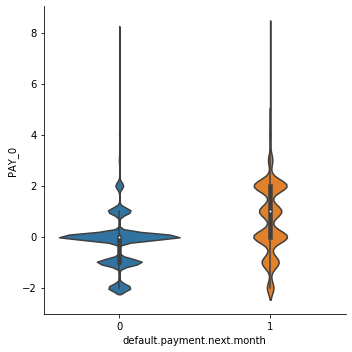

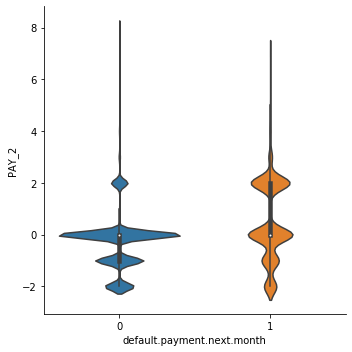

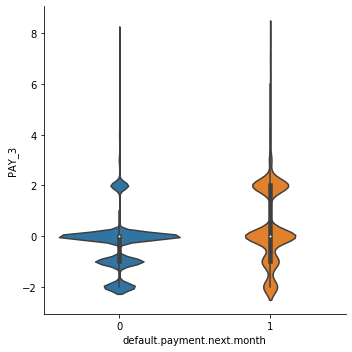

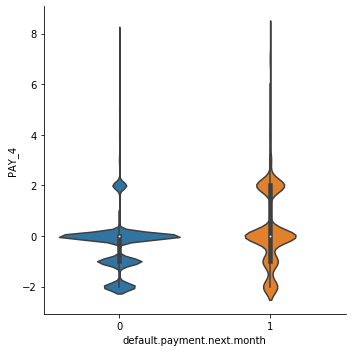

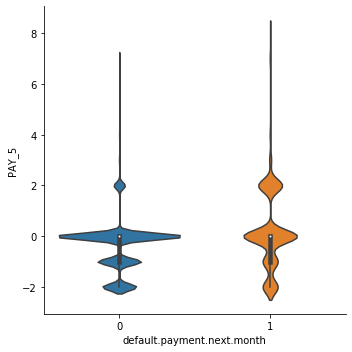

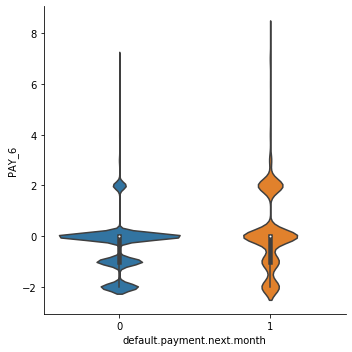

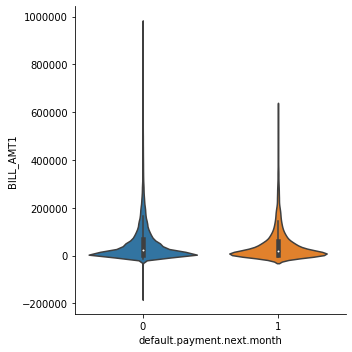

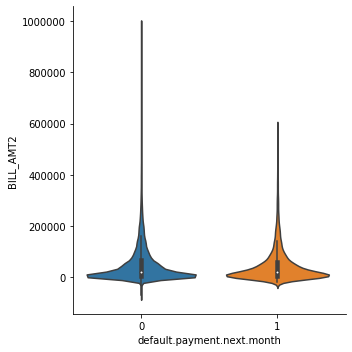

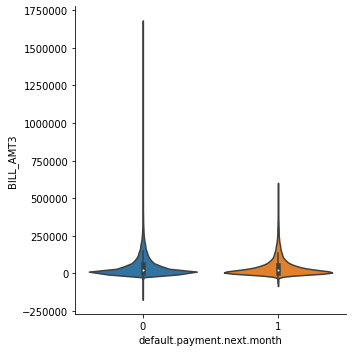

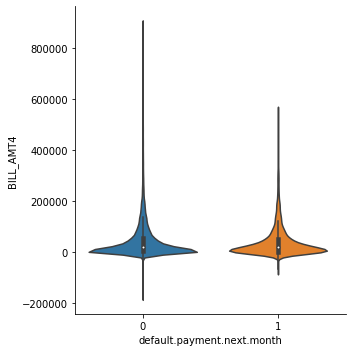

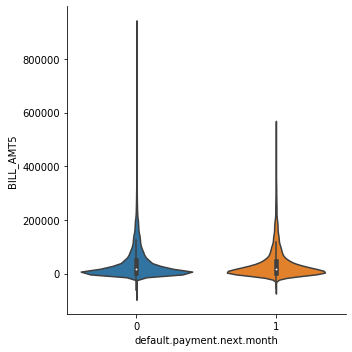

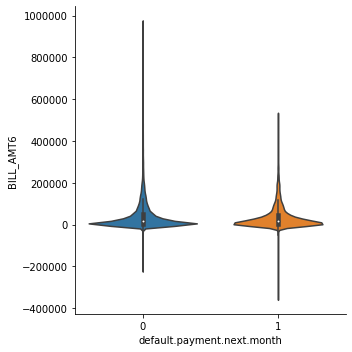

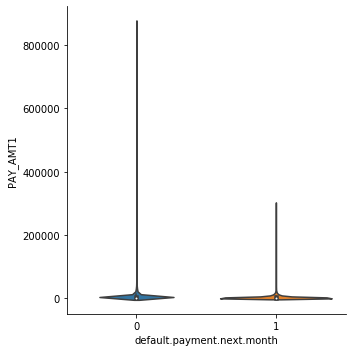

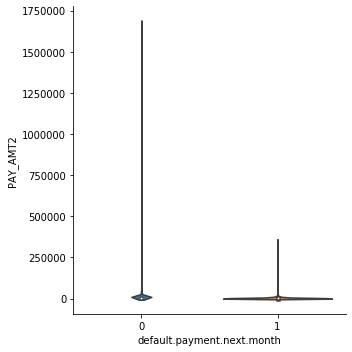

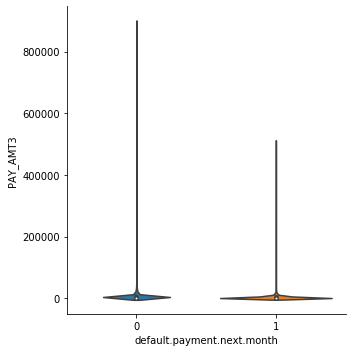

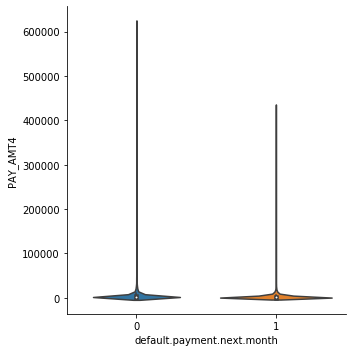

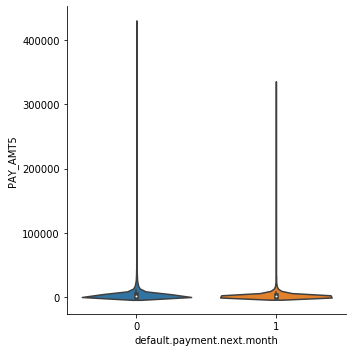

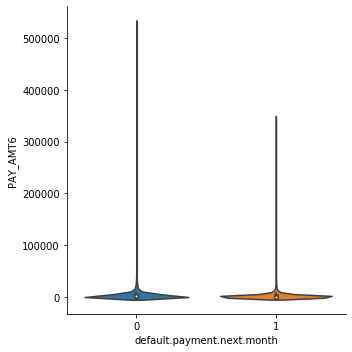

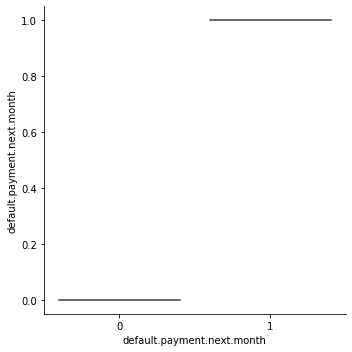

In [6]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in gd.columns:
     if gd[col].dtype != "object":
        cols_list.append(col)
        
# looking at values in these columns
for l in cols_list:
     #sns.jointplot(x=l,y='Duration',data=gd,kind='reg')
        #sns.distplot(Ser)
           sns.catplot(x="default.payment.next.month", y=l,
            kind="violin", data=gd); 

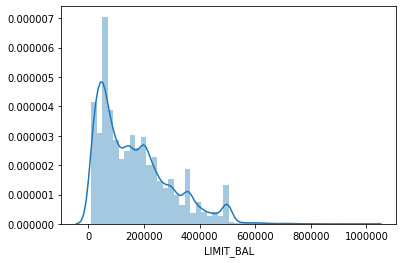

In [14]:
 sns.distplot(gd['LIMIT_BAL'])

Step 4: Train Test Split

Let's split  the data into a training set and a test set!


In [2]:
X = gd.drop({'default.payment.next.month'},axis=1)
y = gd['default.payment.next.month']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Modeling

Step 5: Model 1, Decision Tree

In [4]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10)

In [5]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
tree_predictions_test = dtree.predict(X_test)
tree_predictions_train = dtree.predict(X_train)

In [7]:
print(classification_report(y_test,tree_predictions_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7006
           1       0.65      0.36      0.47      1994

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [8]:
r_a_score = roc_auc_score(y_test, tree_predictions_test)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6548918093131807


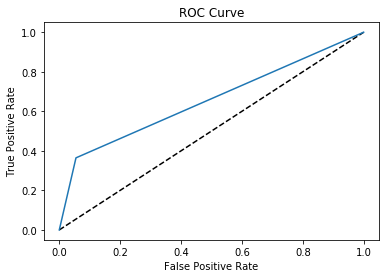

In [9]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, tree_predictions_test)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 
 


In [10]:
print(classification_report(y_train,tree_predictions_train))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16358
           1       0.69      0.36      0.47      4642

    accuracy                           0.82     21000
   macro avg       0.76      0.66      0.68     21000
weighted avg       0.81      0.82      0.80     21000



In [11]:
r_a_score = roc_auc_score(y_train, tree_predictions_train)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6566200343151372


View of Decision Tree

In [ ]:
dot_data = tree.export_graphviz(dtree, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

Step 6: Model 2, Random Forests

Now let's compare the decision tree model to a random forest.


In [33]:
rfc = RandomForestClassifier(max_leaf_nodes=20)
rfc.fit(X_train, y_train)

C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rfc_predictions_test = rfc.predict(X_test)
rfc_predictions_train = rfc.predict(X_train)

In [35]:
print(confusion_matrix(y_test,rfc_predictions_test))

[[6705  261]
 [1449  585]]


In [36]:
print(classification_report(y_test,rfc_predictions_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6966
           1       0.69      0.29      0.41      2034

    accuracy                           0.81      9000
   macro avg       0.76      0.63      0.65      9000
weighted avg       0.79      0.81      0.78      9000



In [38]:
r_a_score = roc_auc_score(y_test, rfc_predictions_test)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6250714596053143


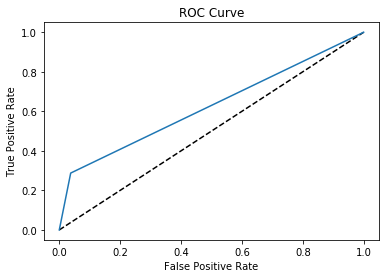

In [39]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions_test)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 

In [40]:
print(classification_report(y_train,rfc_predictions_train))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     16398
           1       0.70      0.29      0.41      4602

    accuracy                           0.82     21000
   macro avg       0.76      0.63      0.65     21000
weighted avg       0.80      0.82      0.79     21000



In [41]:
r_a_score = roc_auc_score(y_train, rfc_predictions_train)
print("ROC-AUC-Score:", r_a_score)


ROC-AUC-Score: 0.627665464020559


Step 7: Model 3, Logistic Regression

In [42]:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) 

C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
log_predictions_test = logmodel.predict(X_test)
log_predictions_train = logmodel.predict(X_train)

In [44]:
print(confusion_matrix(y_test,log_predictions_test))

[[6965    1]
 [2034    0]]


In [45]:
print(confusion_matrix(y_train,log_predictions_train))

[[16398     0]
 [ 4600     2]]


In [46]:
print(classification_report(y_test,log_predictions_test))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6966
           1       0.00      0.00      0.00      2034

    accuracy                           0.77      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.77      0.68      9000



In [47]:
print(classification_report(y_train,log_predictions_train))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     16398
           1       1.00      0.00      0.00      4602

    accuracy                           0.78     21000
   macro avg       0.89      0.50      0.44     21000
weighted avg       0.83      0.78      0.68     21000



In [48]:
r_a_score = roc_auc_score(y_test, log_predictions_test)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.49992822279643984


In [49]:
r_a_score = roc_auc_score(y_train, log_predictions_train)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.5002172968274663


In [50]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.462971
         Iterations 7
                              Results: Logit
Model:              Logit                      Pseudo R-squared: 0.120     
Dependent Variable: default.payment.next.month AIC:              19490.7923
Date:               2020-03-05 19:13           BIC:              19673.6947
No. Observations:   21000                      Log-Likelihood:   -9722.4   
Df Model:           22                         LL-Null:          -11042.   
Df Residuals:       20977                      LLR p-value:      0.0000    
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     7.0000                                                 
------------------------------------------------------------------------------
                 Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
LIMIT_BA

In [30]:
logmodel.predict_proba(X_train)

array([[0.9200155 , 0.0799845 ],
       [0.5663464 , 0.4336536 ],
       [0.6621299 , 0.3378701 ],
       ...,
       [0.40030584, 0.59969416],
       [0.91257404, 0.08742596],
       [0.64593422, 0.35406578]])